##GitHub

In [62]:
!rm -rf .git


In [63]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/SS24 Machine Learning Project/.git/


In [64]:
!git remote add origin https://github.com/T-000/ML24-healthcare-prediction.git


## Setting up the notebook

In [ ]:
team_id = '47'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Machine Learning Project

/content/drive/My Drive/Machine Learning Project


##Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##Dataset
the provided dataset is compiled from a survey of patients in the United States. This dataset encompasses various fea- tures related to health data, demographics, and specific services utilized by individuals.

##Load Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/Data/train.csv")
print("The loaded dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
df.head()

The loaded dataset has 15000 rows and 110 columns


,RACE,SEX,PANEL,WEIGHT,STUDENT_STAT,MIL_ACTIV_DUTY,HON_DISCHARGE,HEALTH_STAT,MENTAL_HLTH,CHRON_BRONCH,...,NUM_PRESCR_MEDS,DIFFIC_HEAR,DIFFIC_SEE,SMOK,OVR_FEEL_14,MENTAL_HLTH_SCR,PHY_HLTH_SCR,OVR_FEEL_30,TOT_MED_EXP,UTILIZATION
0,Non-White,1,19,7205.036720,-1,2,2,2,2,2,...,0,2,2,2,1,43.82,61.41,3,0,LOW
1,White,1,20,5501.113581,-1,4,2,1,1,2,...,12,2,2,2,0,60.12,54.80,0,240,LOW
2,White,1,20,16797.708379,-1,4,1,3,1,2,...,20,2,2,2,0,60.35,30.08,0,791,LOW
3,Non-White,2,19,3605.218411,-1,2,2,3,3,2,...,20,2,2,2,0,58.32,50.22,0,272,LOW
4,Non-White,1,19,11223.127404,1,2,2,1,2,2,...,3,2,2,2,0,62.39,56.71,0,1264,LOW


In [ ]:
# what do do now:


# do not mess up the data too much, standardise everything
# most important thing is parameters can only be learned from the training set, even for preprocessing method.
# make sure to use all the mentioned methods in the lectures.


##Data Exploration


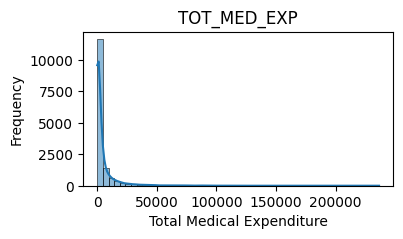

In [ ]:
# Plot distribution of TOT_MED_EXP
plt.figure(figsize=(4, 2))
sns.histplot(df['TOT_MED_EXP'], bins=50, kde=True)
plt.title('TOT_MED_EXP')
plt.xlabel('Total Medical Expenditure')
plt.ylabel('Frequency')
plt.show()

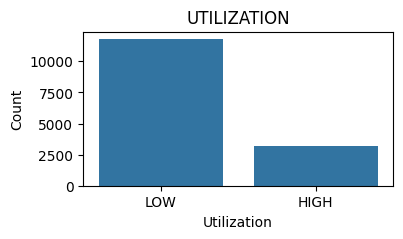

In [ ]:
# Plot distribution of UTILIZATION
plt.figure(figsize=(4,2))
sns.countplot(x=df['UTILIZATION'])
plt.title('UTILIZATION')
plt.xlabel('Utilization')
plt.ylabel('Count')
plt.show()


#Regression task

##Train, Test, Validation Split

In [ ]:
# With log transformation
from sklearn.model_selection import train_test_split

df_1= df.copy()

# Transforming categorical UTILIZATION, RACE  into binary discrete encoding: 1,0
df_1["UTILIZATION"] = (df_1["UTILIZATION"] == 'HIGH').astype(int)
df_1["RACE"] = (df_1["RACE"] == 'White').astype(int)

# Log transform the target variable
df_1["log_TOT_MED_EXP"] = np.log1p(df_1["TOT_MED_EXP"])  # log1p handles log(0) cases

y = df_1['log_TOT_MED_EXP']
X = df_1.drop(columns=['TOT_MED_EXP', 'log_TOT_MED_EXP', 'UTILIZATION'])


print("Labels have shape {}".format(y.shape), "features have shape {}".format(X.shape))

# Split X and y for training and validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=66)

Labels have shape (15000,) features have shape (15000, 108)


In [ ]:
# Without log transformation
from sklearn.model_selection import train_test_split

df_1= df.copy()

df_1["UTILIZATION"] = (df_1["UTILIZATION"] == 'HIGH').astype(int)

df_1["RACE"] = (df_1["RACE"] == 'White').astype(int)


y = df_1['TOT_MED_EXP']
X = df_1.drop(columns=['TOT_MED_EXP', 'UTILIZATION'])


print("Labels have shape {}".format(y.shape), "features have shape {}".format(X.shape))

# Split X and y for training and validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=66)

Labels have shape (15000,) features have shape (15000, 108)


## Preprocessing

In [ ]:
# Handling 0s in WEIGHT feature
X_train['WEIGHT'] = X_train['WEIGHT'].replace(0, pd.NA)
mean_WEIGHT_train = X_train['WEIGHT'].mean()
X_train['WEIGHT'] = X_train['WEIGHT'].fillna(mean_WEIGHT_train)



# Perform the same processing on validation set but using train set's parameter 'mean'
X_val['WEIGHT'] = X_val['WEIGHT'].replace(0, pd.NA)
X_val['WEIGHT'] = X_val['WEIGHT'].fillna(mean_WEIGHT_train)

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)

# convert it back to a dataframe
X_train = pd.DataFrame(scaled_train, columns=X_train.columns)


# Do the same standardisation on val but using the parameters learned from train
scaled_val = scaler.transform(X_val)
X_val = pd.DataFrame(scaled_val, columns=X_val.columns)

#X_val.head()


## Feature Selection

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

#!! feature selection only done in train set

k = 50
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the preprocessed training data
X_train_selected = selector.fit_transform(X_train, y_train)

#print("Selected training features shape:", X_train_selected.shape)

# Get the scores of the features
feature_scores = selector.scores_

# Get the mask of selected features
selected_mask = selector.get_support()

# Create a DataFrame to view feature scores
feature_scores_df = pd.DataFrame({
    'Feature': X_train.columns[selected_mask],
    'Score': feature_scores[selected_mask]
}).sort_values(by='Score', ascending=False)

#print(feature_scores_df)

# Update X_train to only include the selected features
X_train = X_train.loc[:, selected_mask]

#print("Updated X_train shape:", X_train.shape)

# Update X_val to only include the selected features
X_val = X_val.loc[:, selected_mask]

#print("Updated X_val shape:", X_val.shape)


## Linear Regression

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
    y_pred = reg.predict(X_i)


    #X_i, y_i_log = dataset
    #y_i = np.expm1(y_i_log)  # Inverse transform the actual values
    #y_pred_log = reg.predict(X_i)
    #y_pred = np.expm1(y_pred_log)  # Inverse transform the predictions

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')

Split: training data

	RMSE: 10617.72
	MAE: 4497.37
	sqrt(median((y-pred)**2)): 1781.595723939228
	median(abs(y-pred)): 1781.5957195000283



Split: validation data

	RMSE: 11728.43
	MAE: 4670.65
	sqrt(median((y-pred)**2)): 1839.9453032048111
	median(abs(y-pred)): 1839.9450347191778





###Linear regression react badly to log transformation

## Model: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha = 100).fit(X_train, y_train)


In [ ]:

import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
    y_pred = reg.predict(X_i)


    #X_i, y_i_log = dataset
    #y_i = np.exp(y_i_log)  # Inverse transform the actual values
    #y_pred_log = reg.predict(X_i)
    #y_pred = np.exp(y_pred_log)  # Inverse transform the predictions


    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')

Split: training data

	RMSE: 10536.71
	MAE: 4554.13
	sqrt(median((y-pred)**2)): 2014.7046465002975
	median(abs(y-pred)): 2014.7042008587844



Split: validation data

	RMSE: 11688.94
	MAE: 4732.94
	sqrt(median((y-pred)**2)): 2020.8273802044457
	median(abs(y-pred)): 2020.8273465577186





## Model: LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=10, max_iter=10000).fit(X_train, y_train)


In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
    y_pred = reg.predict(X_i)

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')

Split: training data

	RMSE: 10507.89
	MAE: 4554.43
	sqrt(median((y-pred)**2)): 2040.9365111071813
	median(abs(y-pred)): 2040.9364766072144



Split: validation data

	RMSE: 11686.96
	MAE: 4735.25
	sqrt(median((y-pred)**2)): 2048.2574198847938
	median(abs(y-pred)): 2048.256623133152





##Model: Kernel(RBF) Ridge

In [ ]:
from sklearn.kernel_ridge import KernelRidge

reg = KernelRidge(alpha = 1, gamma=0.1,kernel='rbf')
reg.fit(X_train, y_train)

KernelRidge(gamma=0.1, kernel='rbf')

In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
    y_pred = reg.predict(X_i)


    #X_i, y_i_log = dataset
    #y_i = np.expm1(y_i_log)  # Inverse transform the actual values
    #y_pred_log = reg.predict(X_i)
    #y_pred = np.expm1(y_pred_log)  # Inverse transform the predictions

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')

Split: training data

	RMSE: 6650.07
	MAE: 2557.81
	sqrt(median((y-pred)**2)): 857.1174833877607
	median(abs(y-pred)): 857.1174701743153



Split: validation data

	RMSE: 13911.36
	MAE: 4731.78
	sqrt(median((y-pred)**2)): 1324.5286117116973
	median(abs(y-pred)): 1324.5282343867427





## Model: Random Forest

In [ ]:
# Train a RandomForestRegressor without standardizing the features
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#reg = RandomForestRegressor(n_estimators=100, random_state=66)

#
reg = RandomForestRegressor(n_estimators=120, max_depth=None, min_samples_split=6, min_samples_leaf=1, max_features='sqrt', random_state=66)


reg.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=120, random_state=66)

### Model Evaluation

In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    #X_i, y_i = dataset
    #y_pred = reg.predict(X_i)

    X_i, y_i_log = dataset
    y_i = np.expm1(y_i_log)  # Inverse transform the actual values
    y_pred_log = reg.predict(X_i)
    y_pred = np.expm1(y_pred_log)  # Inverse transform the predictions

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')

Split: training data

	RMSE: 9336.76
	MAE: 2607.73
	sqrt(median((y-pred)**2)): 299.18477884338785
	median(abs(y-pred)): 299.18465502996855



Split: validation data

	RMSE: 12879.74
	MAE: 3882.13
	sqrt(median((y-pred)**2)): 561.0287311770808
	median(abs(y-pred)): 561.0224144537499





## Error Analysis:


- parameter tuning reduced RMdSE, but not RMSE, therefore the problem is still outliers.
- the errors are mainly coming from not being able to predict the large values (outliers).

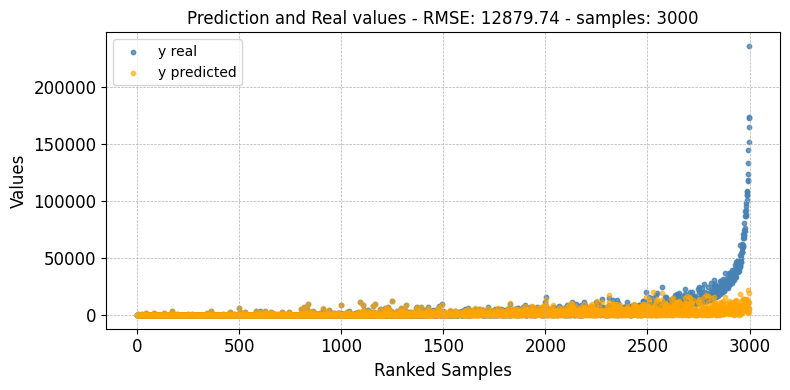

In [ ]:
# Analysis the ranked difference between predictions and labels
df = pd.DataFrame({
    'y_i': y_i,
    'y_pred': y_pred
})

df['difference'] = np.abs(df['y_i'] - df['y_pred'])

# Sort by the difference
df_sorted = df.sort_values(by='difference').reset_index(drop=True)


# Scatter plot high variability data
plt.figure(figsize=(8, 4))
plt.scatter(df_sorted.index, df_sorted['y_i'], label='y real', color='steelblue', s=10, alpha=0.8)
plt.scatter(df_sorted.index, df_sorted['y_pred'], label='y predicted', color='orange', s=10, alpha=0.6)


plt.title(f'Prediction and Real values - RMSE: {rmse:.2f} - samples: {len(df_sorted)}', fontsize=12)
plt.xlabel('Ranked Samples', fontsize=12)
plt.ylabel('Values', fontsize=12)


plt.legend(fontsize=10)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [ ]:
# Calculate errors
errors = np.abs(y_i - y_pred)

# Create a DataFrame with actual, predicted, and errors, preserving the original index
error_analysis = pd.DataFrame({
    'Actual': y_i,
    'Predicted': y_pred,
    'Error': errors
  }, index=y_i.index)

# Rank the errors
error_analysis['Rank'] = error_analysis['Error'].rank(ascending=False)

# Sort by rank
error_analysis = error_analysis.sort_values(by='Rank')

# Display the DataFrame
print("\nError Analysis Ranked:\n", error_analysis)

#top_50_errors = error_analysis.head(60)

# Display the DataFrame
#print("\nTop 50 Error Analysis Ranked:\n", top_50_errors)

# Export the DataFrame to a CSV file
file_name = f"{split_name.replace(' ', '_')}_errors_ranked.csv"
error_analysis.to_csv(file_name)

print(f"\nErrors for {split_name} exported to {file_name}\n\n")





Error Analysis Ranked:
          Actual     Predicted          Error    Rank
5032   236449.0   5763.964207  230685.035793     1.0
6371   173497.0   3135.646810  170361.353190     2.0
14812  165171.0   6607.329439  158563.670561     3.0
11796  173591.0  19841.635457  153749.364543     4.0
8618   151898.0  11736.129280  140161.870720     5.0
...         ...           ...            ...     ...
1570       28.0     27.628912       0.371088  2996.0
6599        0.0      0.311655       0.311655  2997.0
12251       0.0      0.205794       0.205794  2998.0
7423       22.0     21.845435       0.154565  2999.0
1935        0.0      0.089527       0.089527  3000.0

[3000 rows x 4 columns]

Errors for validation data exported to validation_data_errors_ranked.csv




In [ ]:
# List of provided indices
indices_to_include = [
    5032, 6371, 11796, 14812, 8618, 4804, 9694, 5982, 189, 3637, 11613, 10482, 14069,
    3428, 9759, 6846, 11027, 13336, 7972, 679, 3746, 4984, 14071, 2767, 12557, 4114,
    8498, 8851, 8824, 13425, 12823, 10387, 8487, 7997, 13788, 4085, 4784, 7765, 413,
    8094, 1610, 12036, 3701, 8805, 3213, 2944, 6036, 3385, 2025, 862, 11733, 3078,
    12234, 4730, 10757, 2916, 3050, 14959, 467, 3627, 8125, 8731, 5886, 2297, 12777,
    13271, 14143, 6136, 11665, 7821, 172, 4567, 4913, 4230, 2352, 1651, 8040, 13120,
    3160, 11513, 23, 12327, 1427, 4585, 13947, 2435, 14007, 3504, 11914, 358, 10213,
    4173, 4257, 10448, 10912, 404, 12867, 5536, 1114, 3278, 9157, 8028, 3315, 7774,
    1411, 2945, 2442, 632, 2501, 5852, 3239, 9549, 9646, 4182, 11465, 8142, 1982,
    5047, 4463, 282, 14632, 8935, 13992, 14124, 3038, 6937, 3770, 9606, 10565, 12273,
    14392, 11545, 11134, 2056, 12589, 12287, 7741, 2861, 12898, 10396, 1041, 7601,
    2546, 6912, 8900, 6660, 14016, 5187, 12921, 2167, 769, 13277, 7424, 7433, 7151,
    6285, 2457, 7678, 606, 7766, 3893, 10955, 590, 13108, 10935, 7656, 11053, 3623,
    9881, 144, 11689, 2208, 6727, 4643, 8585, 7483, 9214, 12952, 10886, 5626, 6591,
    10417, 9470, 227, 5974, 10081, 12398, 5530, 8207, 13873, 10423, 7394, 5997, 9813,
    1807, 10311, 1708, 7767, 14559, 2015
]

# Adjust indices by subtracting 1 (converting from one-based to zero-based indexing)
#adjusted_indices = [i - 1 for i in indices_to_include]

# Combine X_val and y_val into a single DataFrame
validation_data = X.copy()
validation_data['TOT_MED_EXP'] = y

filtered_validation_data = validation_data.iloc[indices_to_include]

# Filter the DataFrame by the adjusted indices
#filtered_validation_data = validation_data.iloc[adjusted_indices]



# Display the DataFrame
print(f"\nFiltered Validation Data:\n", filtered_validation_data)

# Export the DataFrame to a CSV file
file_name = "filtered_validation_data.csv"
filtered_validation_data.to_csv(file_name, index=False)

print(f"\nFiltered validation data exported to {file_name}\n\n")


Filtered Validation Data:
        RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
5032      1    2     19   6543.339248            -1               2   
6371      1    2     19  38843.375841            -1               4   
11796     0    2     20   6200.346421            -1               4   
14812     1    1     20  19035.687544            -1               4   
8618      0    2     20   2995.720133            -1               4   
...     ...  ...    ...           ...           ...             ...   
10311     0    2     19   3582.308977            -1               2   
1708      1    1     19  15985.694181            -1               2   
7767      0    2     19   7329.676299            -1               4   
14559     0    2     20   8396.244195            -1               2   
2015      0    1     19   2407.026568            -1               4   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  ADHD_DIAG  \
5032               2            3      

## Model: light gradient boosting

In [ ]:
import lightgbm as lgb



def custom_asymmetric_objective(y_pred, y_true):
    y_true = y_true.get_label()
    residual = y_pred - y_true

    # Scaling factor that increases penalty for large true values
    scale = np.log1p(y_true) + 0.5

    # Grad and Hess with increased penalty for large underpredictions
    grad = np.where(residual > 0, residual, 2 * residual * scale)
    hess = np.where(residual > 0, 1, 2 * scale)

    return grad, hess


train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

params = {
    'boosting_type': 'gbdt',
    'objective': custom_asymmetric_objective,
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 100,
    'min_data_in_leaf': 2,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 2,
    'lambda_l2': 0.2,
    'verbose': 0
}

reg = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],

)

[LightGBM] [Info] Using self-defined objective function


In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    #X_i, y_i = dataset
    #y_pred = reg.predict(X_i)


    X_i, y_i_log = dataset
    y_i = np.expm1(y_i_log)  # Inverse transform the actual values
    y_pred_log = reg.predict(X_i)
    y_pred = np.expm1(y_pred_log)  # Inverse transform the predictions


    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')

Split: training data

	RMSE: 7397.99
	MAE: 2555.25
	sqrt(median((y-pred)**2)): 539.7951721566563
	median(abs(y-pred)): 539.79515280094



Split: validation data

	RMSE: 11591.35
	MAE: 3880.29
	sqrt(median((y-pred)**2)): 852.4474240463801
	median(abs(y-pred)): 852.4471997838891





## Model: Multilayer Perceptron

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD
from keras.initializers import HeNormal
from keras import backend as K
from keras.losses import Huber

In [ ]:
# Ensure that the features are uncorrelated and have high variance
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)


In [ ]:
# Define
mlp_model = Sequential()


# Input layer
mlp_model.add(Input(shape=(X_train_pca.shape[1],)))

# Hidden layers with GlorotUniform initializer (or use HeNormal if using ReLU)
#mlp_model.add(Dense(512, activation='relu', kernel_initializer=HeNormal()))
mlp_model.add(Dense(256, activation='relu', kernel_initializer=HeNormal()))
mlp_model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
mlp_model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
mlp_model.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))



# Output layer
mlp_model.add(Dense(1, activation='linear', kernel_initializer=HeNormal()))

# optimiser
#1
learning_rate = 0.005
#0.005 good
optimizer = Adam(learning_rate=learning_rate)



# Compile and train
mlp_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

#mlp_model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber(delta=10), metrics=['mae'])



mlp_model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_data=(X_val_pca, y_val))






Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.5083 - mae: 2.6341 - val_loss: 6.2450 - val_mae: 1.9692
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8693 - mae: 1.8773 - val_loss: 5.4652 - val_mae: 1.7967
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9385 - mae: 1.7055 - val_loss: 5.3234 - val_mae: 1.7929
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5578 - mae: 1.6529 - val_loss: 5.2026 - val_mae: 1.7433
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3802 - mae: 1.6145 - val_loss: 5.1710 - val_mae: 1.7597
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0468 - mae: 1.5334 - val_loss: 5.2630 - val_mae: 1.7082
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.7857 - mae: 1.4619 - val_loss: 5.5654 - val_mae: 1.8001
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.7619 - mae: 1.4384 - val_loss: 5.2946 - val_mae: 1.7955
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - l

### Evaluation

In [ ]:
import numpy as np
import sklearn.metrics as skm


datasets = {
    "training data": [X_train_pca, y_train],
    "validation data": [X_val_pca, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')


    X_i, y_i_log = dataset
    y_pred_log = mlp_model.predict(X_i)

    # Ensure predictions and true values are in NumPy array format and flatten them
    y_pred_log = y_pred_log.flatten()


    # Inverse transform predictions
    y_pred = np.expm1(y_pred_log)
    y_i = np.expm1(y_i_log)


    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")

    # These might also be helpful to look at. Think about why!
    sqrt_median_squared_error = np.sqrt(np.median((y_i - y_pred)**2))
    #  emphasizes larger errors due to squaring the differences before taking the median
    median_absolute_error = np.median(abs(y_i - y_pred))


    print("\tsqrt(median((y-pred)**2)):", sqrt_median_squared_error)
    print("\tmedian(abs(y-pred)):",median_absolute_error)
    print('\n\n')


Split: training data

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
	RMSE: 10318.92
	MAE: 3185.00
	sqrt(median((y-pred)**2)): 432.03053016431517
	median(abs(y-pred)): 432.03047180175776



Split: validation data

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
	RMSE: 12842.40
	MAE: 4080.96
	sqrt(median((y-pred)**2)): 630.6281440593293
	median(abs(y-pred)): 630.6281433105468





## Regression Submission for Test Set

In [ ]:
import os

# Run this to save a file with your predictions on the test set to be submitted
split = 'test_private' # replace by 'test_private' for FINAL submission

#df_test =  pd.read_csv(f'data/{split}.csv')

df_test = pd.read_csv(f"/content/drive/MyDrive/Machine Learning Project/Data/{split}.csv")
print("The loaded dataset has {} rows and {} columns".format(df_test.shape[0], df_test.shape[1]))
df_test.head()


# Process data, the test set always uses the train set's parameters

# transform categorical variable
df_test["RACE"] = (df_test["RACE"] == 'White').astype(int)
# replacing 0 values
df_test['WEIGHT'] = df_test['WEIGHT'].replace(0, pd.NA)
df_test['WEIGHT'] = df_test['WEIGHT'].fillna(mean_WEIGHT_train)

#standardisation(no need for random forest or LightGBM)
#scaled_test = scaler.transform(df_test)
#df_test = pd.DataFrame(scaled_test, columns=df_test.columns)
#df_test.head()


# Make predictions with log transformation
y_hat_log = reg.predict(df_test)
y_hat = np.expm1(y_hat_log)



# Save the results with the format <TEAM_ID>__<SPLIT>__reg_pred.npy
folder = '/content/drive/SS24 My Drive/Machine Learning Project/Submissions'
np.save(os.path.join(folder, f'{team_id}__{split}__reg_pred.npy'), y_hat) # Note the double underscores '__' in the filename


The loaded dataset has 5000 rows and 108 columns


In [ ]:
import numpy as np

file_path = '/content/drive/My Drive/SS24 Machine Learning Project/Submissions/47__test_private__reg_pred.npy'
predictions = np.load(file_path)


for prediction in predictions:
    print(prediction)


178.51276099841948
12095.338240897696
810.0650806063209
5924.109087195546
3609.773820262518
1133.3440602822368
4.9541788259106205
15353.512144805216
45.82178235935364
945.0244386706628
24.05961105277129
2246.0018955069636
13.955099118091802
5668.088600700417
9108.932880130236
88.01457470937272
19302.84866389467
827.3569829605851
700.9332903392524
1396.2932756903351
26946.886726726203
6984.332186092728
1539.9142918142136
25.242564485713125
14697.594194691492
10.5027551661956
4193.882791630105
-0.2694859290120944
699.1460335870943
10260.451673821131
3798.067121086362
23876.792389336755
27.500893250971185
41.90850317972824
29.074263739970366
3576.1997433049537
2.848785603768461
13628.581568591022
27.878520833378126
1.5564402942312017
7765.062664744765
6036.021462366716
146.9096892888174
1835.397609166362
4518.702754689251
1173.848422997571
347.6714844015674
9431.369184943758
1.2914401518652778
8.990374297132494
3665.640743910718
887.4808988375929
3540.756865823024
448.7129665122845
3.2301

#Classification

##Train, Validation, Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df_1= df.copy()

y = df_1['UTILIZATION']


le = preprocessing.LabelEncoder()
df_1['RACE'] = le.fit_transform(df_1['RACE'])

X = df_1.drop(columns=['UTILIZATION','TOT_MED_EXP'])
y = le.fit_transform(y) # maps HIGH to 0 and LOW to 1

print(f'Original classes {le.classes_}')
print(f'Corresponding numeric classes {le.transform(le.classes_)}')


print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}", f", unique entries in y: {np.unique(y)}")


# Split X and y for training and validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 4)

Original classes ['HIGH' 'LOW']
Corresponding numeric classes [0 1]
Shape of X: (15000, 108)
Shape of y: (15000,) , unique entries in y: [0 1]


###Preprocessing

In [ ]:
# Handling 0s in WEIGHT feature
X_train['WEIGHT'] = X_train['WEIGHT'].replace(0, pd.NA)
mean_WEIGHT_train = X_train['WEIGHT'].mean()
X_train['WEIGHT'] = X_train['WEIGHT'].fillna(mean_WEIGHT_train)



# Perform the same processing on validation set but using train set's parameter 'mean'
X_val['WEIGHT'] = X_val['WEIGHT'].replace(0, pd.NA)
X_val['WEIGHT'] = X_val['WEIGHT'].fillna(mean_WEIGHT_train)

### Standardisation

In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)

# convert it back to a dataframe
X_train = pd.DataFrame(scaled_train, columns=X_train.columns)


# Do the same standardisation on val but using the parameters learned from train
scaled_val = scaler.transform(X_val)
X_val = pd.DataFrame(scaled_val, columns=X_val.columns)

#X_val.head()

### Define Performance Metric Function

In [ ]:
def evaluate_classification_model(model, X_train, X_val, y_train, y_val):
  datasets = {
      "training data": [X_train, y_train],
      "validation data": [X_val, y_val]
  }

  for split_name, dataset in datasets.items():
      X_i, y_i = dataset
      y_pred = model.predict(X_i)
      print(f'\nSplit: {split_name}')

      print(skm.classification_report(y_i, y_pred))

## Model: Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=90, random_state=42)
clf.fit(X_train, y_train)

evaluate_classification_model(clf, X_train, X_val, y_train, y_val)


Split: training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2591
           1       1.00      1.00      1.00      9409

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000


Split: validation data
              precision    recall  f1-score   support

           0       0.70      0.49      0.58       621
           1       0.88      0.94      0.91      2379

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



## Model: LightGBM for Classification

### Cross validation for LightGBM

In [ ]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Copy the DataFrame and prepare X and y
df_1 = df.copy()
y = df_1['UTILIZATION']

# Encode the RACE feature
le = LabelEncoder()
df_1['RACE'] = le.fit_transform(df_1['RACE'])

# Prepare the features and labels
X = df_1.drop(columns=['UTILIZATION', 'TOT_MED_EXP'])
y = le.fit_transform(y)  # maps HIGH to 0 and LOW to 1

print(f'Original classes {le.classes_}')
print(f'Corresponding numeric classes {le.transform(le.classes_)}')

# Define the preprocessing functions
def preprocess_weight(X_train, X_val):
    X_train['WEIGHT'] = X_train['WEIGHT'].replace(0, pd.NA)
    mean_WEIGHT_train = X_train['WEIGHT'].mean()
    #X_train['WEIGHT'] = X_train['WEIGHT'].fillna(mean_WEIGHT_train)
    X_train.loc[:, 'WEIGHT'] = X_train['WEIGHT'].fillna(mean_WEIGHT_train)


    X_val['WEIGHT'] = X_val['WEIGHT'].replace(0, pd.NA)
    X_val['WEIGHT'] = X_val['WEIGHT'].fillna(mean_WEIGHT_train)  # Use the mean from the training set

    return X_train, X_val

def standardize_data(X_train, X_val):
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
    return X_train, X_val

# Define the parameter grid for LightGBM
param_grid = {
    'num_leaves': [26, 31, 36, 41],
    'learning_rate': [0.06, 0.065, 0.07, 0.075]
}

# Store the results
best_thresholds = {}

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=99)

# Preprocessing combinations
preprocessing_combinations = [
    (False, False),
    (True, False),
    (False, True),
    (True, True)
]

# Iterate over preprocessing combinations
for use_weight, use_standardization in preprocessing_combinations:
    print(f'\nPreprocessing: Weight={use_weight}, Standardization={use_standardization}')

    # Iterate over all parameter combinations
    for num_leaves in param_grid['num_leaves']:
        for learning_rate in param_grid['learning_rate']:

            # LightGBM Parameters
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'boosting_type': 'gbdt',
                'num_leaves': num_leaves,
                'learning_rate': learning_rate,
                'feature_fraction': 0.9,
                'bagging_fraction': 0.8,
            }

            # Store F1 scores for each fold
            fold_f1_scores = []

            # Cross-validation loop
            for train_index, test_index in kf.split(X):
                X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
                y_train_fold, y_test_fold = y[train_index], y[test_index]

                # Apply preprocessing within each fold
                if use_weight:
                    X_train_fold, X_test_fold = preprocess_weight(X_train_fold, X_test_fold)

                if use_standardization:
                    X_train_fold, X_test_fold = standardize_data(X_train_fold, X_test_fold)

                # Create LightGBM Dataset
                train_data = lgb.Dataset(X_train_fold, label=y_train_fold)

                # Train the model
                clf = lgb.train(params, train_data, num_boost_round=100)

                # Predict on the fold validation data
                y_pred_proba = clf.predict(X_test_fold)

                # Get the false positive rate, true positive rate, and thresholds for ROC
                fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_proba)

                # Calculate the AUC
                roc_auc = auc(fpr, tpr)

                # Find the best threshold based on macro-averaged F1 score
                best_f1 = 0
                best_threshold = 0.5
                for threshold in thresholds:
                    y_pred = (y_pred_proba >= threshold).astype(int)
                    current_f1 = f1_score(y_test_fold, y_pred, average='macro')
                    if current_f1 > best_f1:
                        best_f1 = current_f1
                        best_threshold = threshold

                # Store the best F1 score for this fold
                fold_f1_scores.append(best_f1)

            # Calculate average F1 score across folds
            avg_f1 = np.mean(fold_f1_scores)

            # Store the best F1 score and threshold for this preprocessing and parameter combination
            best_thresholds[(use_weight, use_standardization, num_leaves, learning_rate)] = (best_threshold, avg_f1)

            # Output the best F1 score and threshold
            print(f'Num Leaves: {num_leaves}, Learning Rate: {learning_rate}, Best Threshold: {best_threshold:.2f}, Avg Macro F1: {avg_f1:.4f}')

# Output the best decision boundaries
print("\nBest Decision Boundaries for Each Preprocessing and Parameter Combination:")
for params, (threshold, f1) in best_thresholds.items():
    print(f'Preprocessing: Weight={params[0]}, Standardization={params[1]}, Num Leaves: {params[2]}, Learning Rate: {params[3]}, Best Threshold: {threshold:.2f}, Best Macro F1: {f1:.4f}')


### Train the best model

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# LightGBM-Parameter definieren
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 36,
    'learning_rate': 0.07,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,

}

# LightGBM-Datasets erstellen
train_data = lgb.Dataset(X_train, label=y_train)

# Modell trainieren
clf = lgb.train(params, train_data, num_boost_round=100)

# Evaluierung auf Trainings- und Validierungsdaten
datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    X_i, y_i = dataset

    # Vorhersagen mit dem Modell machen
    y_pred_proba = clf.predict(X_i)

    # Wahrscheinlichkeiten in binäre Klassen umwandeln
    y_pred = [1 if prob > 0.6 else 0 for prob in y_pred_proba]

    # Ergebnisse ausgeben
    print(f'\nSplit: {split_name}')
    print(classification_report(y_i, y_pred))

[LightGBM] [Info] Number of positive: 9425, number of negative: 2575
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3029
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 106
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.785417 -> initscore=1.297516
[LightGBM] [Info] Start training from score 1.297516

Split: training data
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      2575
           1       0.95      0.95      0.95      9425

    accuracy                           0.92     12000
   macro avg       0.88      0.89      0.88     12000
weighted avg       0.92      0.92      0.92     12000


Split: validation data
              precision    recall  f1-score   support

           0     

##Classification Submission for Test Set

In [ ]:
from sklearn.preprocessing import LabelEncoder
import os

# Run this to save a file with your predictions on the test set to be submitted
split = 'test_private' # replace by 'test_private' for FINAL submission


df_test = pd.read_csv(f"/content/drive/MyDrive/Machine Learning Project/Data/{split}.csv")
print("The loaded dataset has {} rows and {} columns".format(df_test.shape[0], df_test.shape[1]))
df_test.head()


# Process data, the test set always uses the train set's parameters

# transform categorical variable
df_test['RACE'] = LabelEncoder().fit_transform(df_test['RACE'])

# replacing 0 values
df_test['WEIGHT'] = df_test['WEIGHT'].replace(0, pd.NA)
df_test['WEIGHT'] = df_test['WEIGHT'].fillna(mean_WEIGHT_train)

#standardisation
scaled_test = scaler.transform(df_test)
df_test = pd.DataFrame(scaled_test, columns=df_test.columns)
df_test.head()


# Make predictions without log transformation
y_hat_prob = clf.predict(df_test)
y_hat = [1 if prob > 0.6 else 0 for prob in y_hat_prob]


# Save the results with the format <TEAM_ID>__<SPLIT>__reg_pred.npy
folder = '/content/drive/My Drive/SS24 Machine Learning Project/Submissions'
np.save(os.path.join(folder, f'{team_id}__{split}__clf_pred.npy'), y_hat) # Note the double underscores '__' in the filename


The loaded dataset has 5000 rows and 108 columns


In [ ]:
import numpy as np

file_path = '/content/drive/My Drive/SS24 Machine Learning Project/Submissions/47__test_private__clf_pred.npy'
predictions = np.load(file_path)


for prediction in predictions:
    print(prediction)

1
0
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
0
0
0
1
1
0
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
1
0
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0


# Fairness in Classification
- demographic parity(group fairness)the probability of a positive outcome should be the same for all groups.
- equal opportunity: requires the model to have equal true positive rates across different groups.



In [ ]:
def test_error(y_pred,y_true):
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.numpy()
        y_true = y_true.numpy()
    return np.mean(y_pred!=y_true)

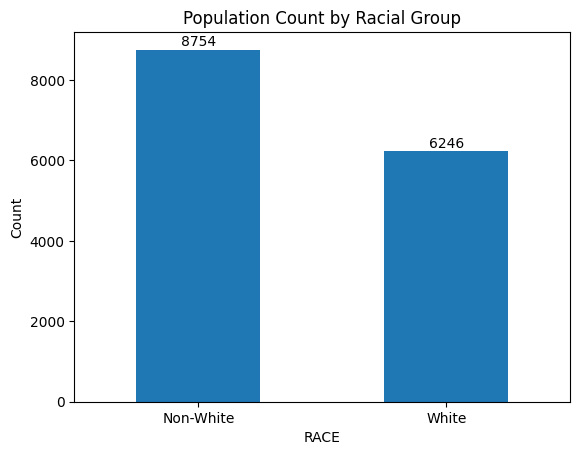

In [ ]:
# distribution of RACE

race_counts = df['RACE'].value_counts()

# Plotting the population count for each racial group
race_counts.plot(kind='bar')  # Default colors or customize as needed

# Adding title and labels
plt.title('Population Count by Racial Group')
plt.xlabel('RACE')
plt.ylabel('Count')

plt.xticks(rotation=0)

# Display the values on top of the bars
for i, value in enumerate(race_counts):
    plt.text(i, value + 0.01*value, str(value), ha='center')

# Show plot
plt.show()

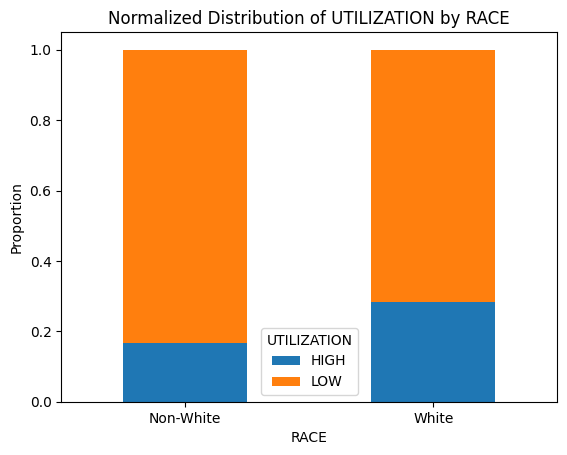

the white population has 11.62% more people labelled with high utilisation


In [ ]:
# Create a crosstab to count occurrences of each combination of RACE and UTILIZATION
crosstab = pd.crosstab(df['RACE'], df['UTILIZATION'], normalize='index')

# Plotting the normalized counts
crosstab.plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Normalized Distribution of UTILIZATION by RACE')
plt.xlabel('RACE')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

# Adding legend
plt.legend(title='UTILIZATION')

# Calculate the percentage difference for HIGH UTILIZATION between Non-White and White
high_utilization_diff = (crosstab.loc['White', 'HIGH'] - crosstab.loc['Non-White', 'HIGH']) * 100

# Show plot
plt.show()

# Print the difference in percentage

print(f"the white population has {high_utilization_diff:.2f}% more people labelled with high utilisation" )


Epoch 1: loss 3.949411630630493
Epoch 500: loss 0.7507298588752747
Epoch 1000: loss 0.5014423131942749
Epoch 1500: loss 0.4472004771232605
Epoch 2000: loss 0.43125131726264954

Training model with lambda = 0
Epoch 1: loss 4.336970329284668
Epoch 500: loss 0.9098338484764099
Epoch 1000: loss 0.6076076626777649
Epoch 1500: loss 0.5072228908538818
Epoch 2000: loss 0.4347226023674011


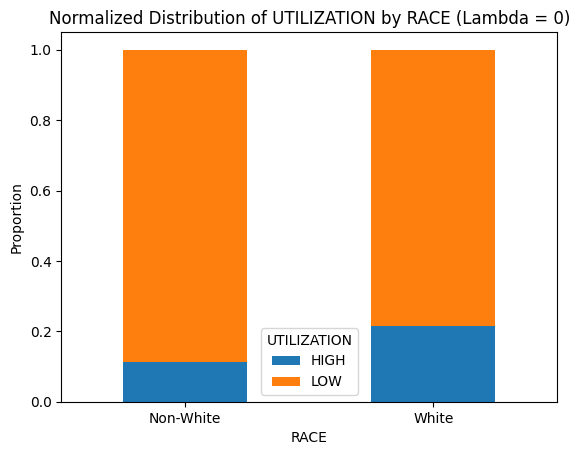

Difference in HIGH UTILIZATION predictions for lambda=0: 10.23%
F1 Macro Score for lambda=0: 0.7549

Training model with lambda = 1
Epoch 1: loss 3.605764627456665
Epoch 500: loss 0.7381789684295654
Epoch 1000: loss 0.5369886159896851
Epoch 1500: loss 0.4552405774593353
Epoch 2000: loss 0.40926283597946167


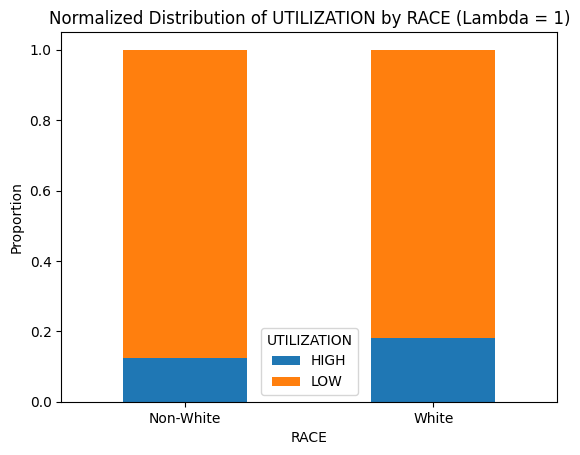

Difference in HIGH UTILIZATION predictions for lambda=1: 5.77%
F1 Macro Score for lambda=1: 0.7459

Training model with lambda = 10
Epoch 1: loss 5.062948226928711
Epoch 500: loss 0.8029111623764038
Epoch 1000: loss 0.4840151071548462
Epoch 1500: loss 0.4051847755908966
Epoch 2000: loss 0.38505810499191284


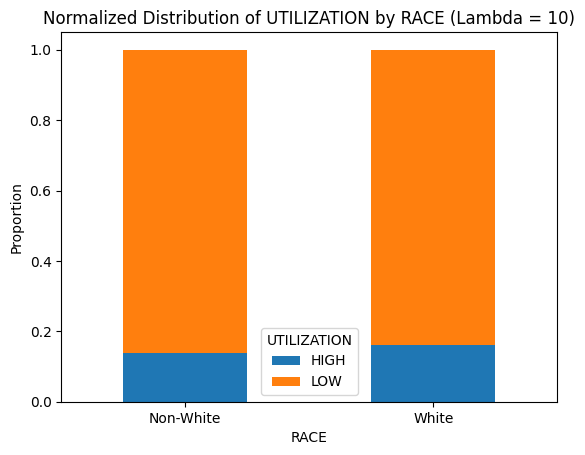

Difference in HIGH UTILIZATION predictions for lambda=10: 2.32%
F1 Macro Score for lambda=10: 0.7403

Training model with lambda = 100
Epoch 1: loss 9.430900573730469
Epoch 500: loss 0.8563051819801331
Epoch 1000: loss 0.5040088295936584
Epoch 1500: loss 0.44196996092796326
Epoch 2000: loss 0.4090033173561096


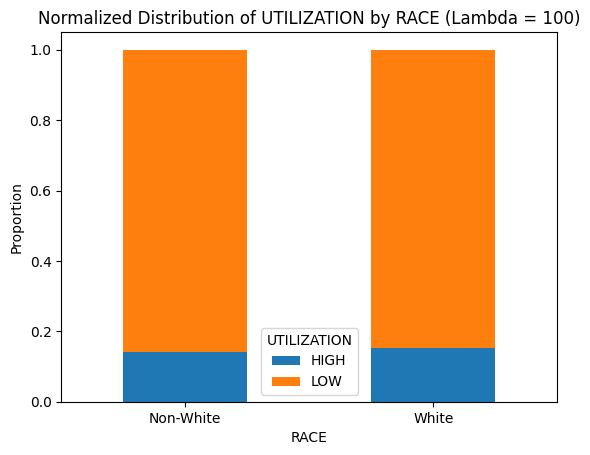

Difference in HIGH UTILIZATION predictions for lambda=100: 1.17%
F1 Macro Score for lambda=100: 0.7369

Training model with lambda = 1000
Epoch 1: loss 5.131562232971191
Epoch 500: loss 0.8494201302528381
Epoch 1000: loss 0.594112753868103
Epoch 1500: loss 0.5407010316848755
Epoch 2000: loss 0.5125240683555603


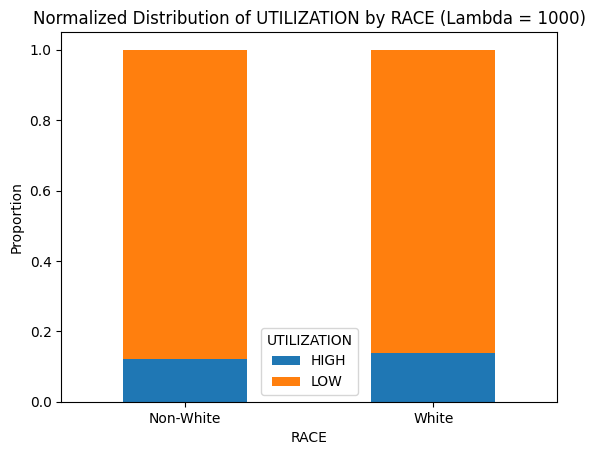

Difference in HIGH UTILIZATION predictions for lambda=1000: 1.76%
F1 Macro Score for lambda=1000: 0.7300


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

df_1 = df.copy()

# Encode UTILIZATION and RACE columns using LabelEncoder
le = LabelEncoder()
df_1['RACE'] = le.fit_transform(df_1['RACE'])
y = le.fit_transform(df_1['UTILIZATION'])  # Maps HIGH to 0 and LOW to 1

# Prepare features (X) and drop TOT_MED_EXP and UTILIZATION
X = df_1.drop(columns=['UTILIZATION', 'TOT_MED_EXP'])

# Split the sensitive attribute from X
sensitive_attr_column = 'RACE'
sensitive_attr = df_1[sensitive_attr_column]

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(X, y, sensitive_attr, test_size=0.2, random_state=42)

# 4. Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Convert sensitive attribute to tensors
s_train_tensor = torch.tensor(s_train.values, dtype=torch.float32)
s_test_tensor = torch.tensor(s_test.values, dtype=torch.float32)

# Define the Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self, size):
        super().__init__()
        self.theta = nn.Parameter(torch.randn(size, 1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return torch.sigmoid(torch.matmul(x, self.theta) + self.bias).flatten()

    def predict(self, x):
        return self.forward(x) >= 0.5

# Gradient descent function
@torch.no_grad()
def gradient_descent(model, learning_rate):
    model.theta -= learning_rate * model.theta.grad
    model.bias -= learning_rate * model.bias.grad

# Training function
def train(model, loss_function, x, y, epochs, learning_rate, print_freq=500, verbose=True, **kwargs):
    for i in range(epochs):
        model.zero_grad()  # Zeroes the gradient buffers of all parameters

        y_pred = model(x)  # Forward pass
        loss = loss_function(y_pred, y, **kwargs)  # Compute the custom loss function

        if (i == 0 or (i+1) % print_freq == 0) and verbose:
            print(f'Epoch {i+1}: loss {loss.item()}')

        loss.backward()  # Backward pass to compute the gradient
        gradient_descent(model, learning_rate)  # Update parameters using gradient descent

# Demographic parity function
def demographic_parity(y_pred, mask):
    y_cond = y_pred * mask.float()  # Conditioned elements
    return y_cond.sum() / mask.sum()  # Average prediction for the group defined by the mask

# Custom loss function with fairness constraint (dp_loss)
def dp_loss(y_pred, y, X_sens, lambda_= 100):
    bce_loss = nn.functional.binary_cross_entropy(y_pred, y)  # Binary cross-entropy loss
    sp_unprotected = demographic_parity(y_pred, X_sens)
    sp_protected = demographic_parity(y_pred, 1 - X_sens)
    return bce_loss + lambda_ * (sp_unprotected - sp_protected) ** 2

# Define and train the model
input_size = X_train_tensor.size(1)
my_model_sp = LogisticRegression(input_size)
my_loss_function = dp_loss

train(my_model_sp, my_loss_function, X_train_tensor, y_train_tensor, X_sens=s_train_tensor, epochs=2000, learning_rate=0.05)

def evaluate(model, X, y, Z, lambda_val):
    # Forward pass to get the predicted probabilities and predictions
    y_pred_prob = model.forward(X).detach().numpy()
    y_pred = model.predict(X).detach().numpy().astype(int)


    # Correct mapping based on LabelEncoder
    race_labels = {0: 'Non-White', 1: 'White'}
    test_df = pd.DataFrame({
        'RACE': Z,
        'PREDICTED_UTILIZATION': np.where(y_pred == 1, 'LOW', 'HIGH')  # Adjusted for encoding
    })
    test_df['RACE'] = test_df['RACE'].map(race_labels)  # Map encoded race to original labels

    # Crosstab and plot
    crosstab = pd.crosstab(test_df['RACE'], test_df['PREDICTED_UTILIZATION'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Normalized Distribution of UTILIZATION by RACE (Lambda = {lambda_val})')
    plt.xlabel('RACE')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(title='UTILIZATION')
    plt.show()

    # Difference in HIGH UTILIZATION predictions
    high_utilization_diff = (crosstab.loc['White', 'HIGH'] - crosstab.loc['Non-White', 'HIGH']) * 100
    print(f"Difference in HIGH UTILIZATION predictions for lambda={lambda_val}: {high_utilization_diff:.2f}%")

    # Calculate F1 score
    f1_macro = f1_score(y, y_pred, average='macro')
    f1_weighted = f1_score(y, y_pred, average='weighted')
    print(f"F1 Macro Score for lambda={lambda_val}: {f1_macro:.4f}")



# Loop through different values of lambda
lambda_values = [0, 1, 10, 100, 1000]  # Define the different values of lambda

for lambda_val in lambda_values:
    print(f"\nTraining model with lambda = {lambda_val}")

    # Define and train the model
    my_model_sp = LogisticRegression(X_train_tensor.size(1))
    my_loss_function = lambda y_pred, y, X_sens: dp_loss(y_pred, y, X_sens, lambda_=lambda_val)

    train(my_model_sp, my_loss_function, X_train_tensor, y_train_tensor, X_sens=s_train_tensor, epochs=2000, learning_rate=0.05)

    # Evaluate the model
    evaluate(my_model_sp, X_test_tensor, y_test_tensor.numpy(), s_test_tensor.numpy(), lambda_val=lambda_val)


In [ ]:
# Verify the mapping

le = LabelEncoder()
df_2 = df.copy()
df_2['RACE'] = le.fit_transform(df_2['RACE'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Non-White': 0, 'White': 1}
